In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#libraries for ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso
import xgboost as xgb
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

#librries used for ignore warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
clean=pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\flight_Clean_Dataset.csv")

In [3]:
clean.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
# Droping the useless column 'Unnamed: 0'
clean=clean.drop('Unnamed: 0',axis=1)

In [5]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
clean.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
clean.select_dtypes(include=[np.number]).corr().T

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [8]:
clean.shape

(300153, 11)

In [9]:
clean1=clean.groupby(['flight','airline'],as_index=False).count()
clean1.airline.value_counts()

airline
Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: count, dtype: int64

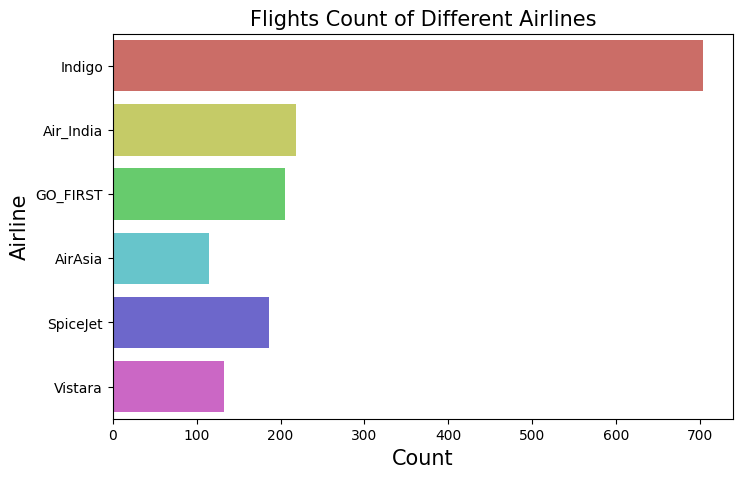

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(clean1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Airline',fontsize=15)
plt.show()

In [11]:
clean2=clean.groupby(['flight','airline','class'],as_index=False).count()
clean2['class'].value_counts()

class
Economy     1560
Business     295
Name: count, dtype: int64

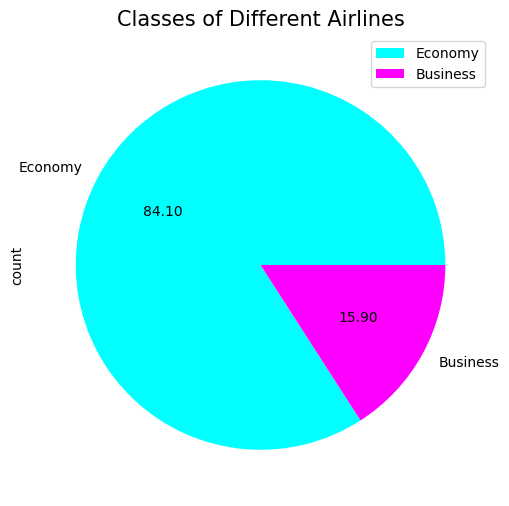

In [12]:
plt.figure(figsize=(8,6))
clean2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

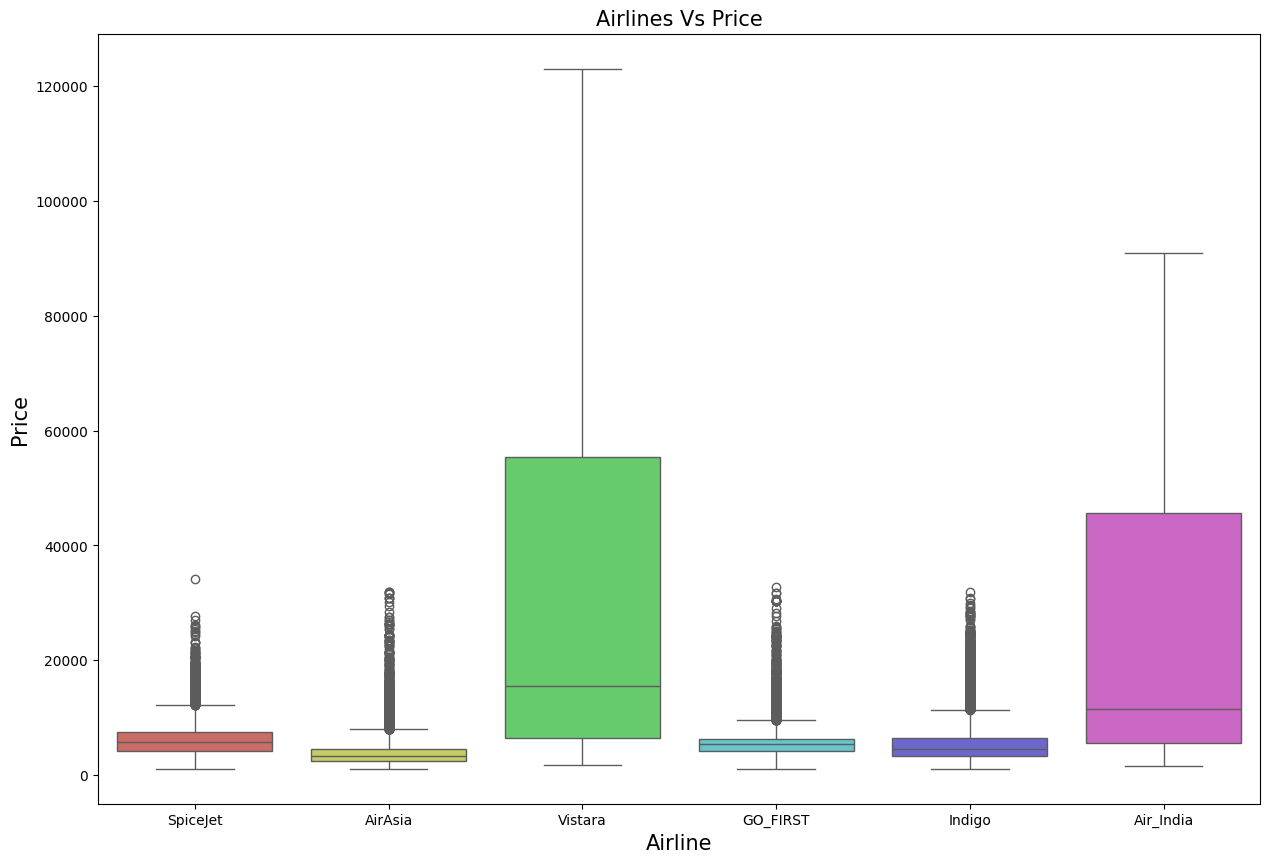

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(x=clean['airline'],y=clean['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

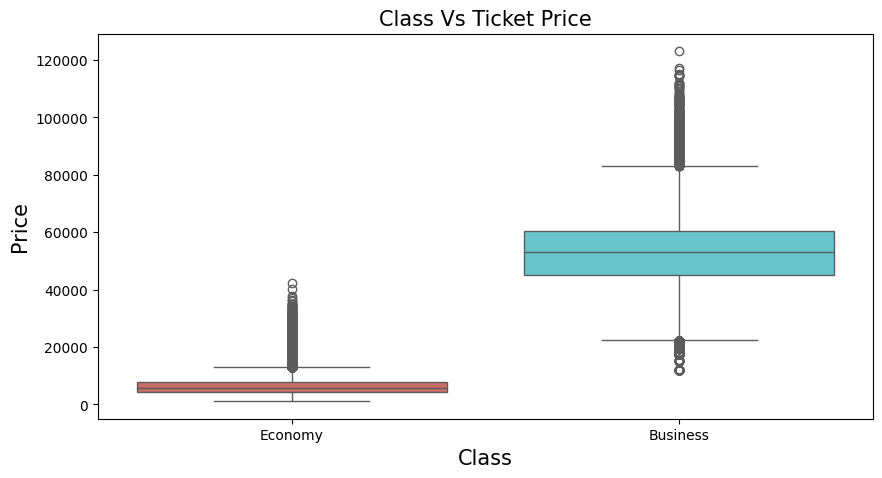

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x=clean['class'],y=clean['price'],data=clean,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

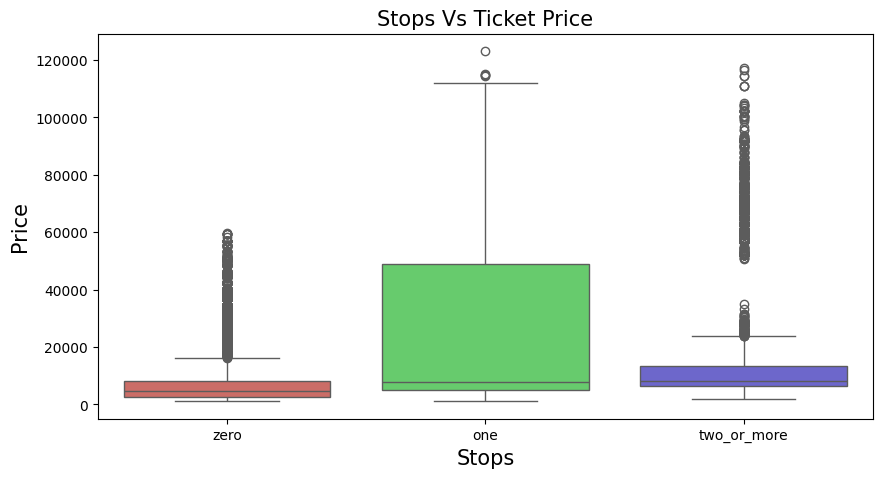

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=clean,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

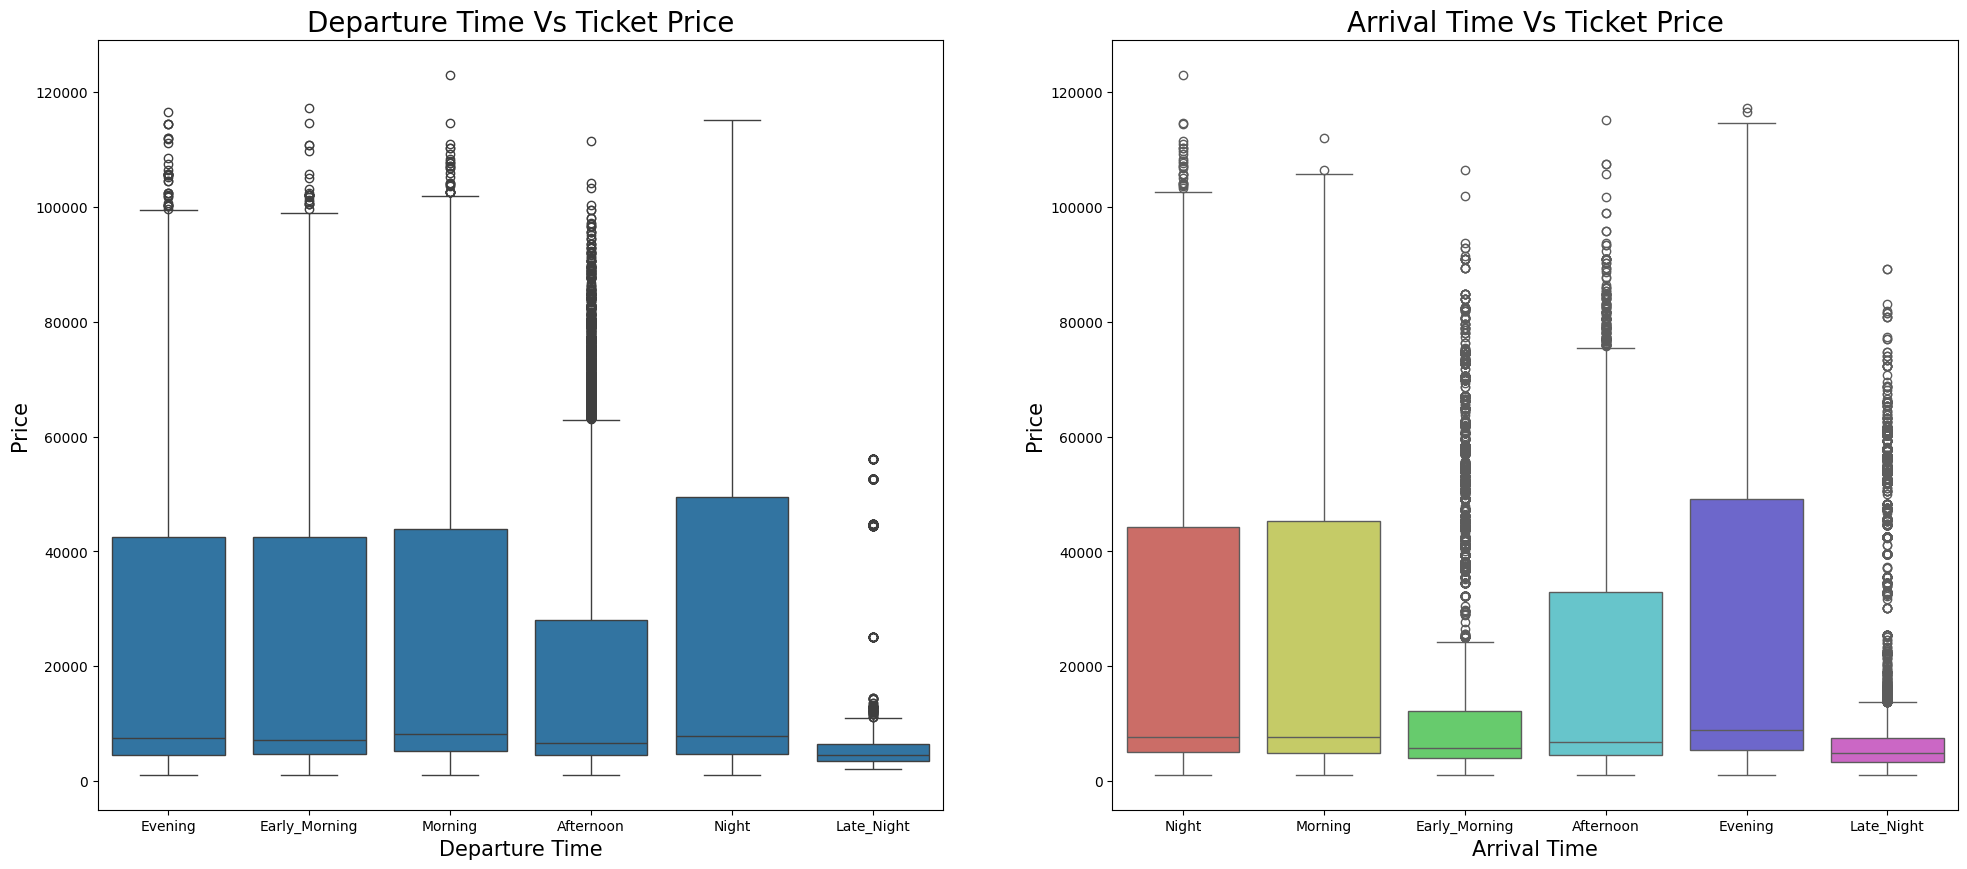

In [16]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=clean)
plt.title('Departure Time Vs Ticket Price',fontsize=20)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=clean,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=20)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

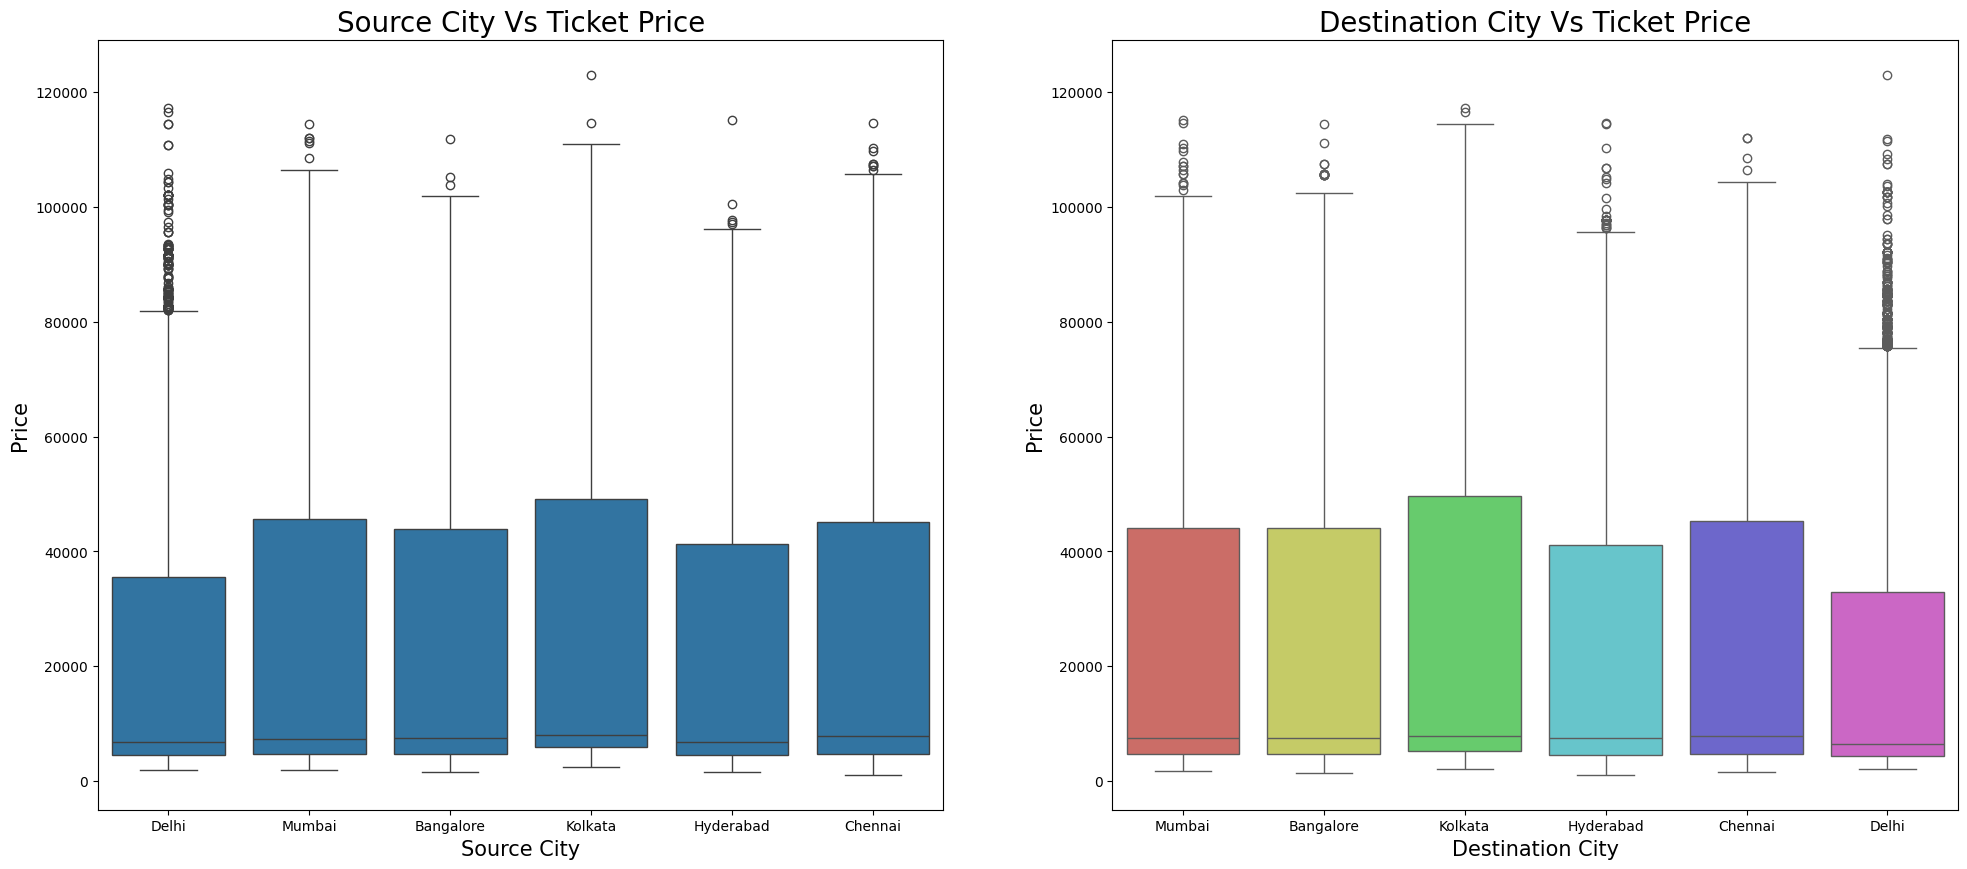

In [17]:
plt.figure(figsize=(24,10))
plt.subplot(1,2,1)
sns.boxplot(x='source_city',y='price',data=clean)
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='destination_city',y='price',data=clean,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

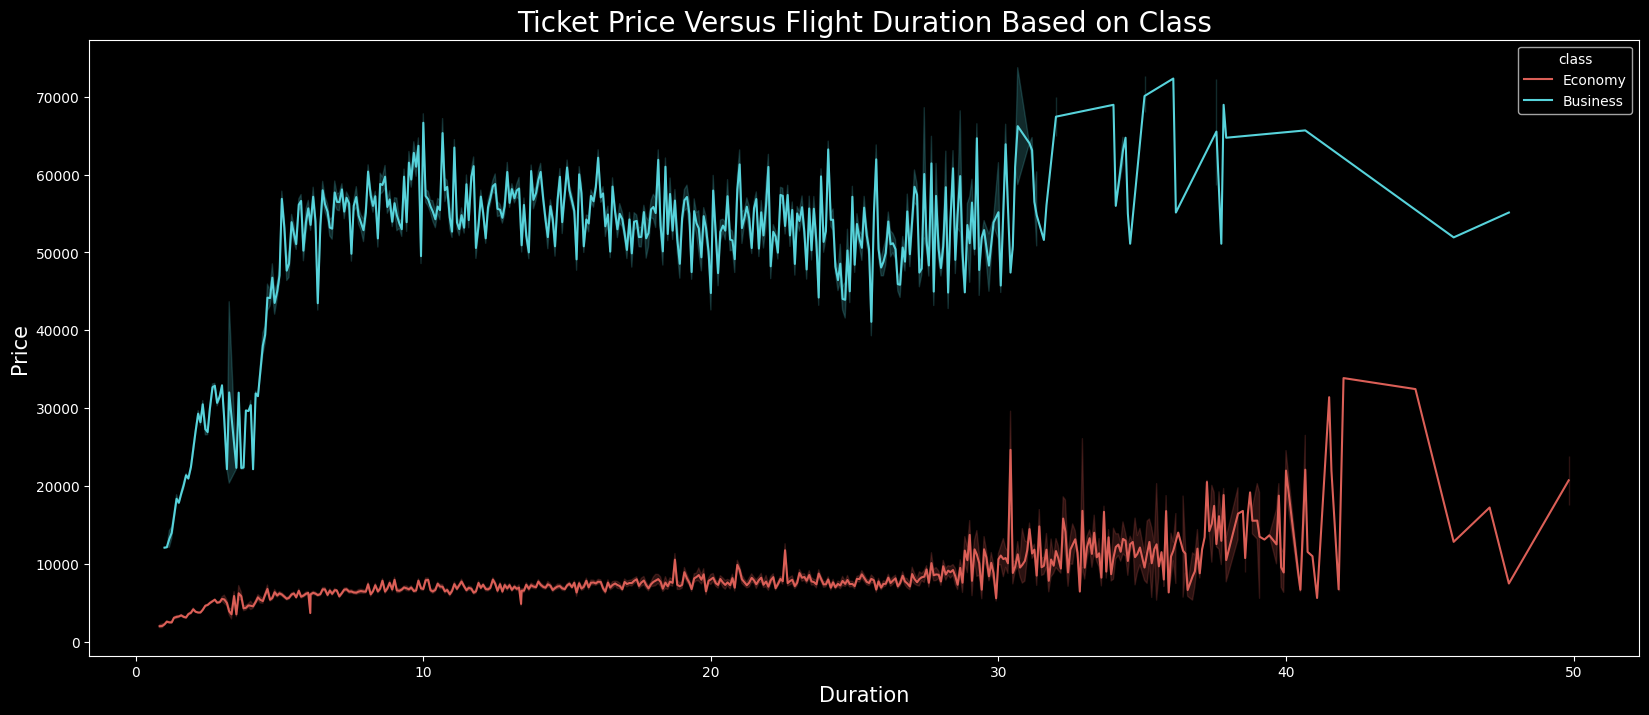

In [18]:
plt.style.use('dark_background')
plt.figure(figsize=(20,8))
sns.lineplot(data=clean,x='duration',y='price',hue='class',palette='hls')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

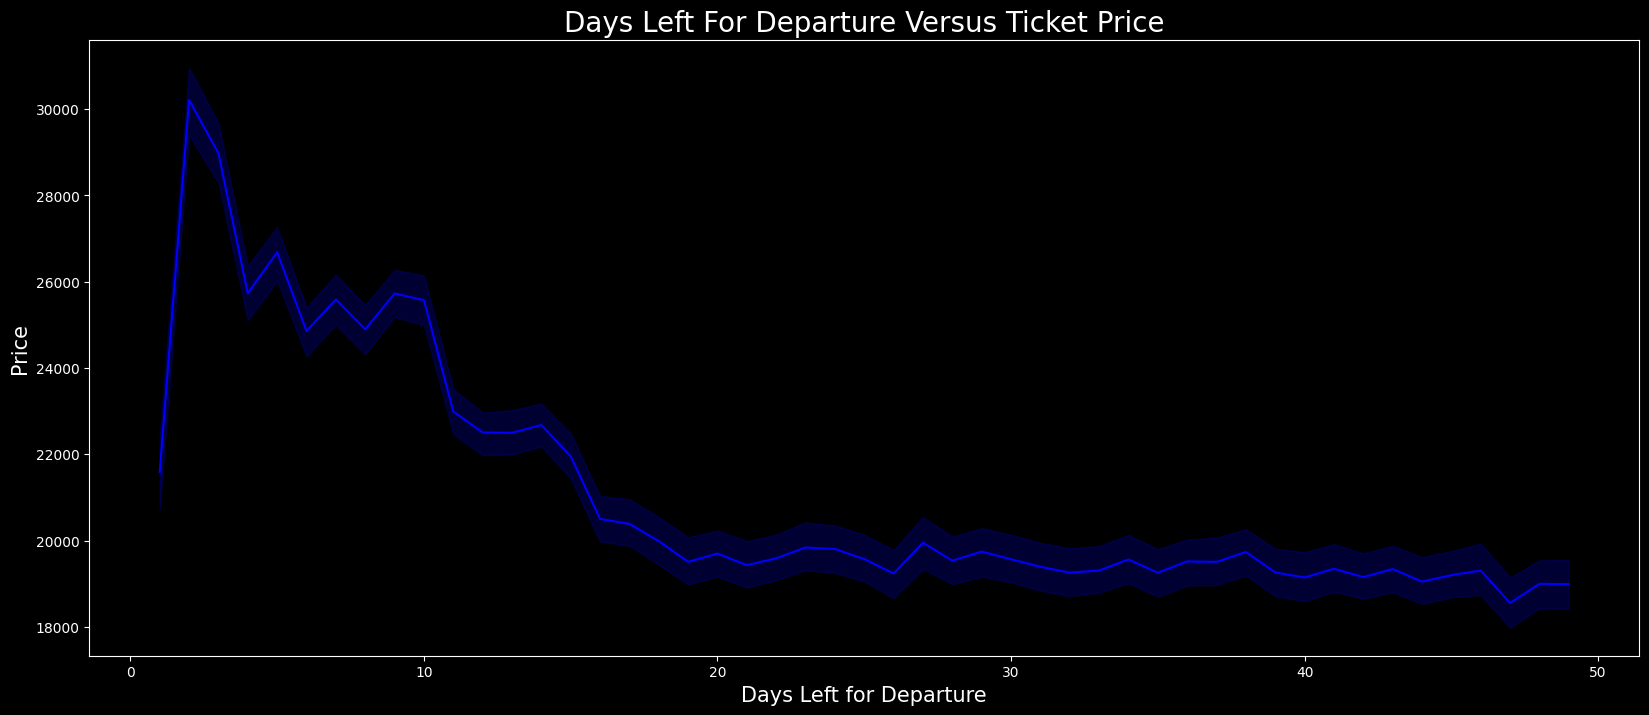

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=clean,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

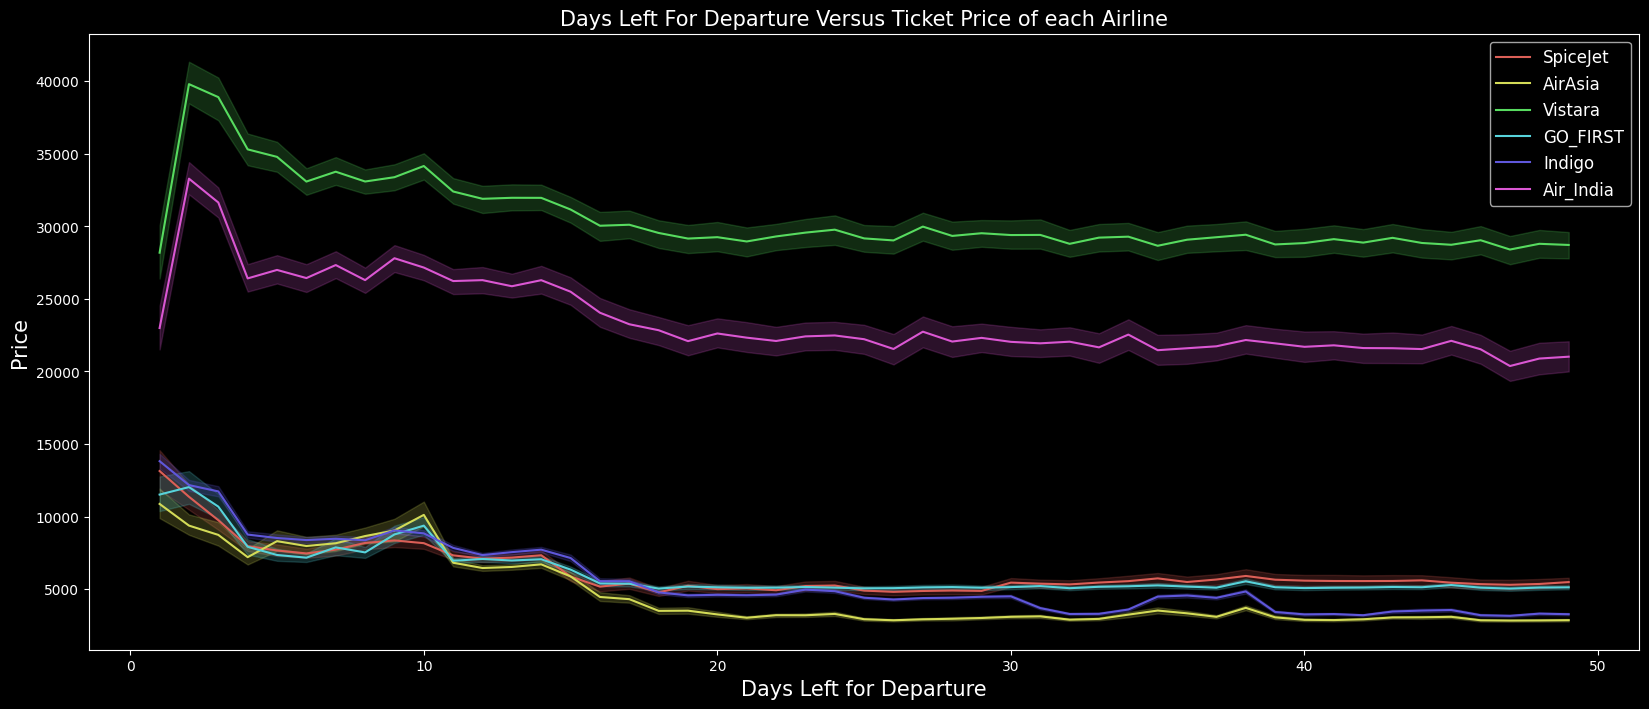

In [20]:
plt.figure(figsize=(20,8))
sns.lineplot(data=clean,x='days_left',y='price',color='blue',hue='airline',palette='hls')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

In [21]:
clean.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [22]:
clean.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


# label encoder

In [23]:
le=LabelEncoder()
for col in clean.columns:
    if clean[col].dtype=='object':
        clean[col]=le.fit_transform(clean[col])

In [24]:
sns.pairplot(clean)

## dropping cloumn "price"

In [25]:
# storing the Dependent Variables in X and Independent Variable in Y
x=clean.drop(['price'],axis=1)
y=clean['price']

## splitting 

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

# MinMaxScaler

In [28]:
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [29]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
pd.DataFrame(a).head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


# ML models
## 1. LinearRegression
## 2. DecisionTreeRegressor
## 3. BaggingRegressor
## 4. RandomForestRegressor
## 5. SVR
## 6. XGBRegressor
## 7. KNeighborsRegressor
## 8. ExtraTreesRegressor
## 9. Ridge
## 10. linear_model

In [30]:
# Create objects of Regression / Regressor models with default hyper-parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)
modelGBR = GradientBoostingRegressor(
    loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, 
    criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
    init=None, random_state=None, max_features=None, alpha=0.9, verbose=0,
    max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, 
    n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0
)

# Initialize Results DataFrame
Results = pd.DataFrame(columns=[
    'Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square',
    'Root_Mean_Squared_Error_RMSE', 'Mean_Absolute_Percentage_Error_MAPE',
    'Mean_Squared_Error_MSE', 'Root_Mean_Squared_Log_Error_RMSLE', 'R2_score'
])

# List of models
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag, modelRE, modelLO]

# Function to calculate MAPE
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, np.finfo(float).eps, y_true))) * 100

# Example dataset (replace x_train, x_test, y_train, y_test with actual data)
# Ensure `x` and `y` are defined if calculating Adjusted R-Square
x_train, x_test, y_train, y_test = x_train, x_test, y_train, y_test  # Replace with actual split data
x, y = np.vstack([x_train, x_test]), np.hstack([y_train, y_test])

# Initialize a list to store results
results_list = []

# Evaluate models
for models in MM:
    # Fit the model with train data
    models.fit(x_train, y_train)
    
    # Predict with test data
    y_pred = models.predict(x_test)

    
    # Print metrics
    print('Model Name: ', models)
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred), 3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred), 3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred), 6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))), 3))
    print('Mean Absolute Percentage Error (MAPE):', round(MAPE(y_test, y_pred), 2), '%')
    
    # Calculate Adjusted R-Squared
    r_squared = metrics.r2_score(y_test, y_pred)
    adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
    print('Adj R Square: ', round(adjusted_r_squared, 6))
    print('------------------------------------------------------------------------------------------------------------')

    # Append results to the list
    new_row = {
        'Model Name': models,
        'Mean_Absolute_Error_MAE': metrics.mean_absolute_error(y_test, y_pred),
        'Adj_R_Square': adjusted_r_squared,
        'Root_Mean_Squared_Error_RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'Mean_Absolute_Percentage_Error_MAPE': MAPE(y_test, y_pred),
        'Mean_Squared_Error_MSE': metrics.mean_squared_error(y_test, y_pred),
        'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
        'R2_score': r_squared
    }
    results_list.append(new_row)
# Convert the list of results to a DataFrame
Results = pd.DataFrame(results_list)
# Display Results
print(Results)

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4630.242
Mean Squared Error (MSE): 49069997.494
Root Mean Squared Error (RMSE): 7004.998
R2_score: 0.904657
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error (MAPE): 43.89 %
Adj R Square:  0.904654
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 1268.551
Mean Squared Error (MSE): 13842766.719
Root Mean Squared Error (RMSE): 3720.587
R2_score: 0.973103
Root Mean Squared Log Error (RMSLE): 8.222
Mean Absolute Percentage Error (MAPE): 8.71 %
Adj R Square:  0.973103
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 1172.513
Mean Squared Error (MSE): 8234891.229
Root Mean Squared Error (RMSE): 2869.65
R2_score: 0.984
Root Mean Squared Log Error (RMSLE): 7.962
Mean A

In [31]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4630.242106,0.904654,7004.998037,43.887045,4.907000e+07,8.854379,0.904657
1,DecisionTreeRegressor(),1268.551433,0.973103,3720.586878,8.710044,1.384277e+07,8.221637,0.973103
2,"(DecisionTreeRegressor(max_features=1.0, rando...",1172.512935,0.983999,2869.650018,7.912396,8.234891e+06,7.961945,0.984000
3,KNeighborsRegressor(),1854.345965,0.971643,3820.227316,11.109400,1.459414e+07,8.248065,0.971644
4,"(ExtraTreeRegressor(random_state=919279827), E...",1143.484941,0.984847,2792.612698,7.658648,7.798686e+06,7.934733,0.984847
5,([DecisionTreeRegressor(criterion='friedman_ms...,2808.070407,0.956823,4713.930298,20.673019,2.222114e+07,8.458277,0.956824
6,"XGBRegressor(base_score=None, booster=None, ca...",1845.132777,0.977616,3394.132910,14.097315,1.152014e+07,8.129804,0.977616
7,(DecisionTreeRegressor(random_state=1891811878...,1205.135039,0.982899,2966.670494,8.318277,8.801134e+06,7.995196,0.982899
8,Ridge(),4630.259805,0.904654,7004.994188,43.887232,4.906994e+07,8.854379,0.904657
9,Lasso(alpha=0.1),4630.125653,0.904654,7004.988785,43.883936,4.906987e+07,8.854378,0.904657


In [32]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984847,1143.484941,2792.612698,7.658648,7.798686e+06,7.934733,0.984847
1,RandomForestRegressor,0.983999,1172.512935,2869.650018,7.912396,8.234891e+06,7.961945,0.984000
2,BaggingRegressor,0.982899,1205.135039,2966.670494,8.318277,8.801134e+06,7.995196,0.982899
3,XGBRegressor,0.977616,1845.132777,3394.132910,14.097315,1.152014e+07,8.129804,0.977616
4,DecisionTreeRegressor,0.973103,1268.551433,3720.586878,8.710044,1.384277e+07,8.221637,0.973103
5,KNeighborsRegressor,0.971643,1854.345965,3820.227316,11.109400,1.459414e+07,8.248065,0.971644
6,GradientBoostingRegressor,0.956823,2808.070407,4713.930298,20.673019,2.222114e+07,8.458277,0.956824
7,Lasso Regression,0.904654,4630.125653,7004.988785,43.883936,4.906987e+07,8.854378,0.904657
8,Ridge Regression,0.904654,4630.259805,7004.994188,43.887232,4.906994e+07,8.854379,0.904657
9,LinearRegression,0.904654,4630.242106,7004.998037,43.887045,4.907000e+07,8.854379,0.904657


In [33]:
#Trainig the model with
modelETR.fit(x_train, y_train)
# Predict the model with test data
y_pred = modelETR.predict(x_test)

In [34]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=clean.merge(out,left_index=True,right_index=True)

In [35]:
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
88834,4,1266,0,5,2,3,2,1,2.67,25,4756,4756,4691.76
165725,1,913,3,2,0,4,0,1,18.92,4,8381,8381,9783.03
226373,1,817,5,1,0,2,2,0,10.08,15,59021,59021,57512.42
116765,5,1499,0,2,0,2,1,1,24.00,17,4672,4672,5134.86
116165,3,431,0,4,2,4,1,1,1.08,10,3498,3498,3509.65
102691,1,888,0,2,0,5,5,1,26.42,49,6086,6086,5814.71
16282,3,624,2,0,0,5,0,1,9.83,32,4007,4007,4856.74
131989,5,1449,4,2,0,4,5,1,16.83,29,6067,6067,6055.84
139251,0,1164,4,0,0,3,0,1,11.50,28,4056,4056,4005.89
3560,3,604,2,1,0,2,5,1,8.67,19,7782,7782,4437.89


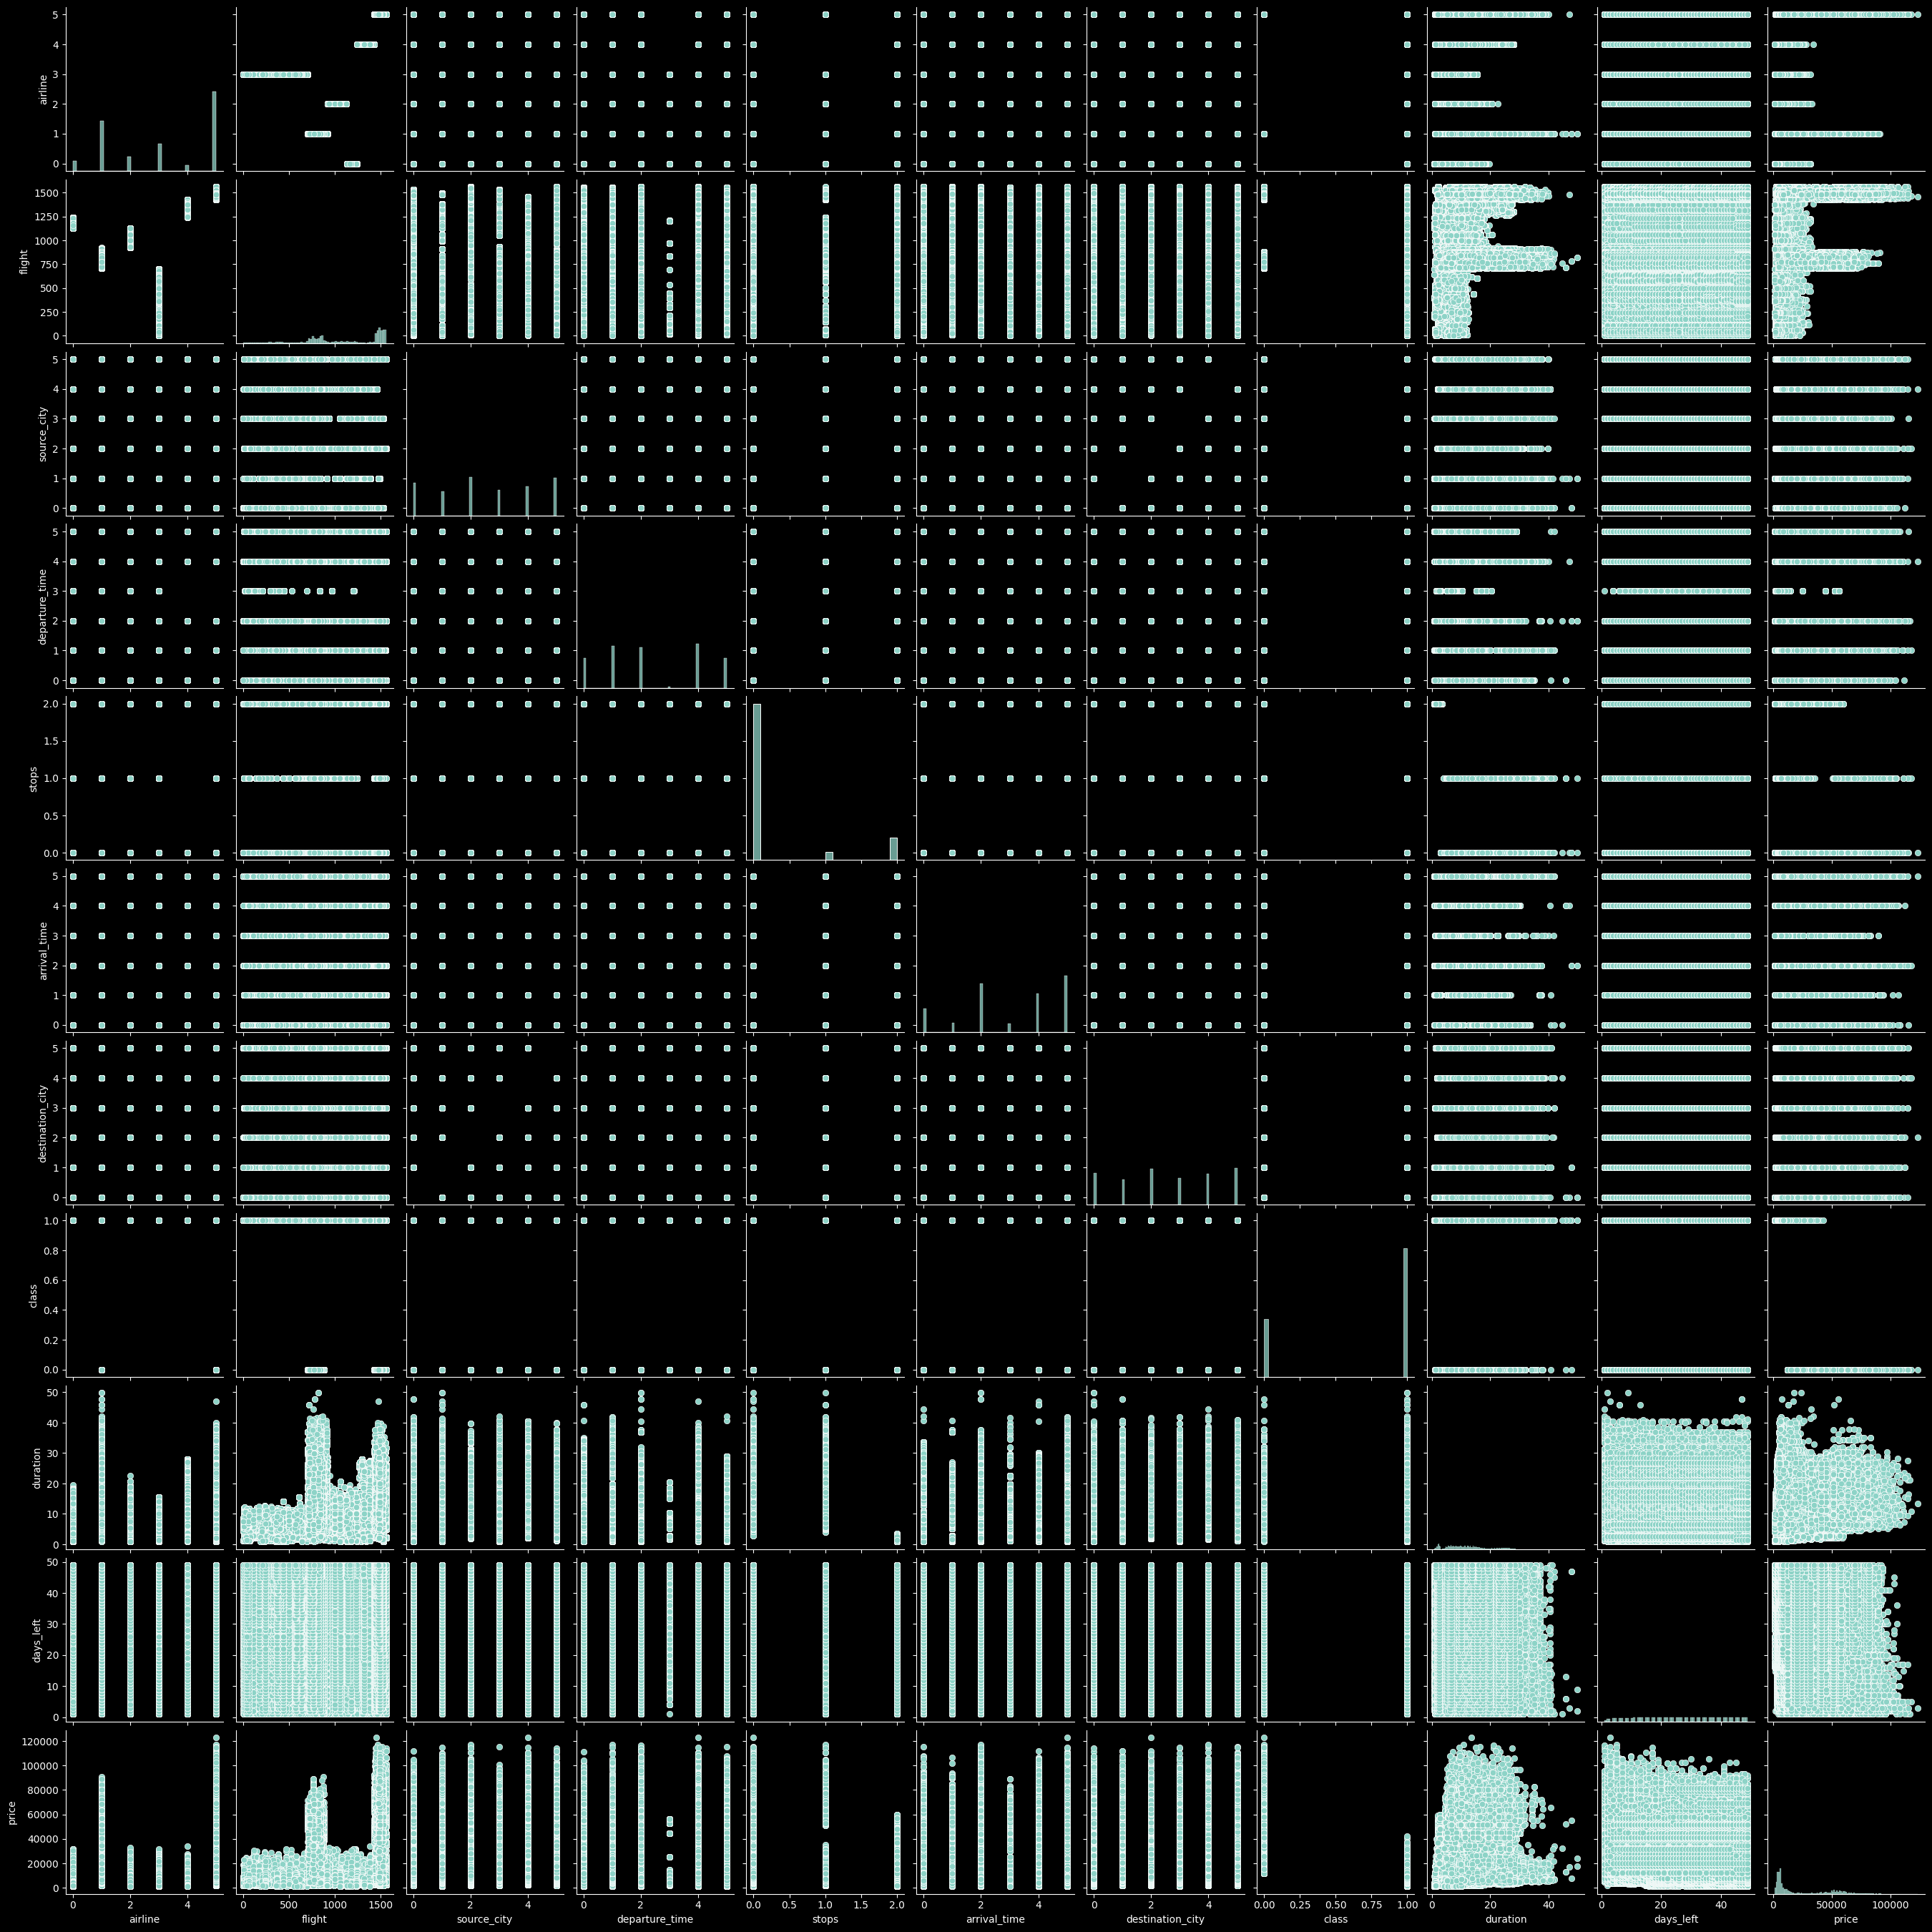

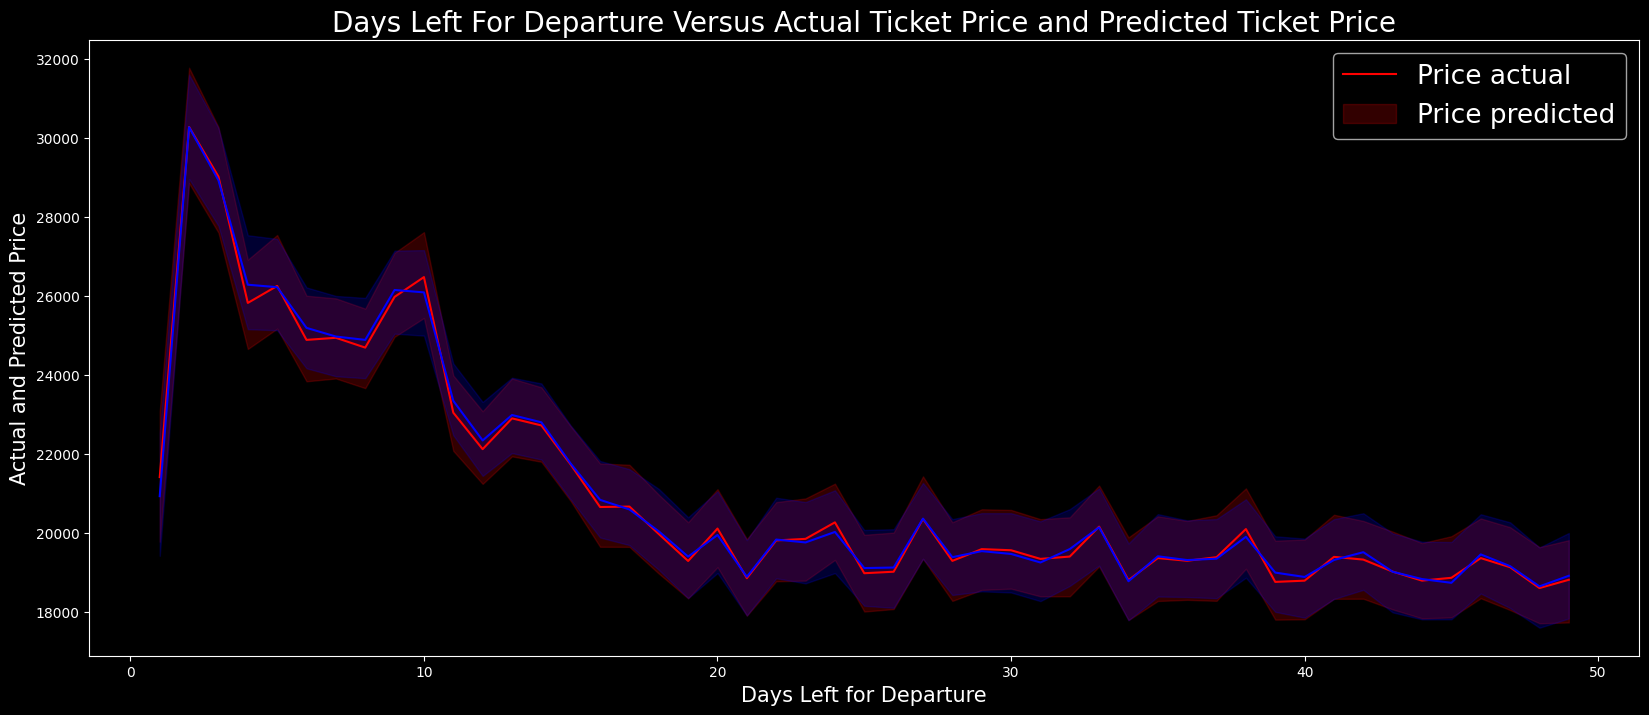

In [36]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='red')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='blue')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['Price actual','Price predicted'],fontsize=19)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

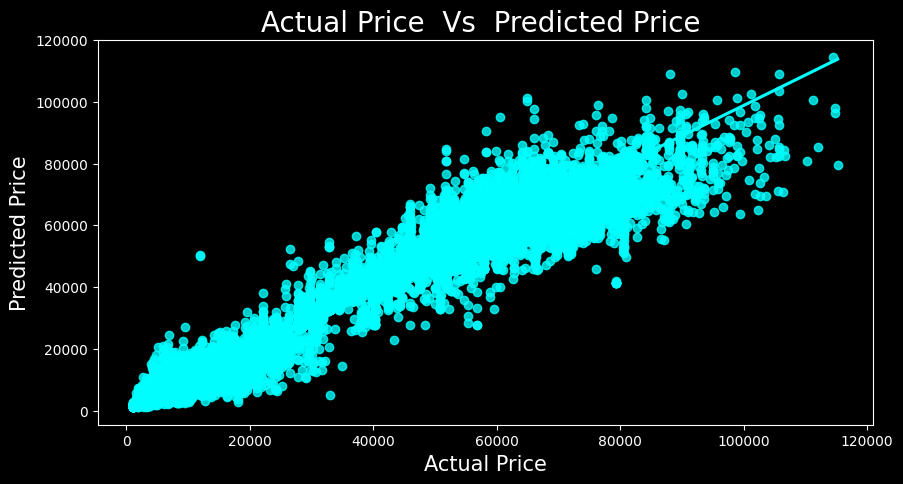

In [37]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

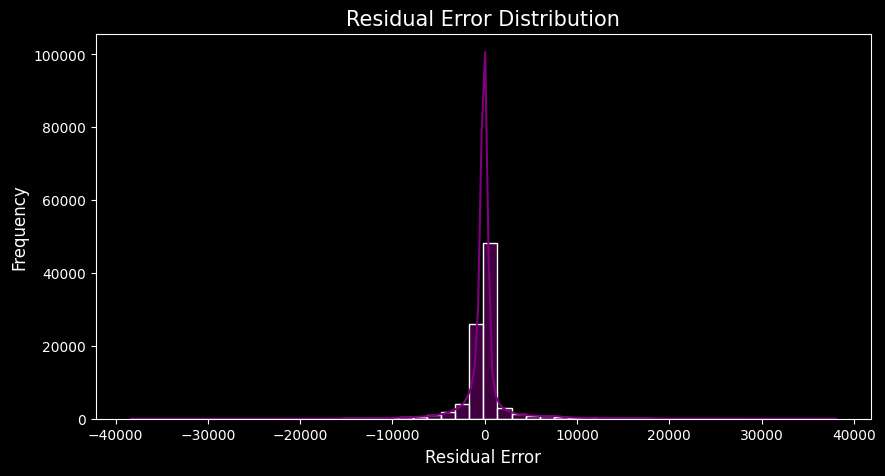

In [38]:
# Residual Errors
residuals = y_test - y_pred

# Plot residuals distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=50, kde=True, color='purple')
plt.title("Residual Error Distribution", fontsize=15)
plt.xlabel("Residual Error", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


# Evaluate Model Performance

In [39]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


R² Score: 0.9848
Mean Absolute Error (MAE): 1144.4638
Mean Squared Error (MSE): 7827484.6882
Root Mean Squared Error (RMSE): 2797.7642


# Feature Importance (For Tree-based Models like ExtraTreesRegressor)

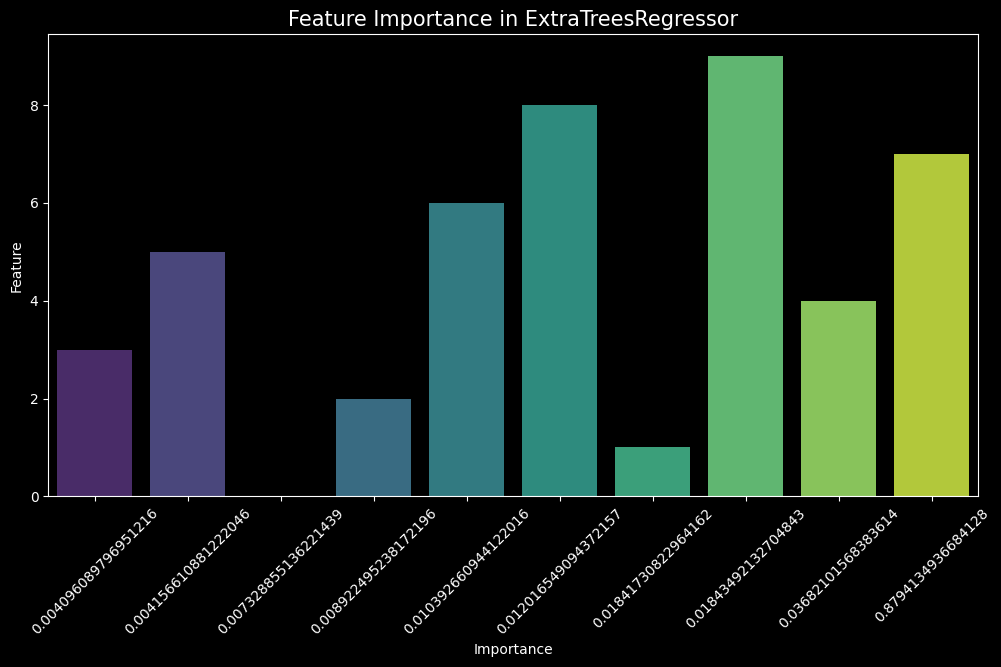

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance in ExtraTreesRegressor", fontsize=15)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()


# Save the Model for Future Use

In [ ]:
import joblib

# Save the trained model
joblib.dump(modelETR, "FLIGHT_PRICE_model.pkl")

# Load the model later
loaded_model = joblib.load("FLIGHT_PRICE_model.pkl")
